In [1]:
#Libraries

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("/home/jc/Escritorio/Proyectos_finales_ironhack/ih_datamadpt0420_project_m2/diamonds_train.csv")

### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [3]:
data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [4]:
data.describe()

carat         depth         table         price             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.797706     61.752841     57.446133   3928.444469      5.729392   
std        0.475544      1.431725      2.233535   3992.416147      1.124453   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2397.000000      5.690000   
75%        1.040000     62.500000     59.000000   5331.000000      6.540000   
max        4.500000     79.000000     95.000000  18823.000000     10.230000   

                  y             z  
count  40455.000000  40455.000000  
mean       5.732819      3.537154  
std        1.146650      0.697062  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.540000      4.035000  
max       58.900000      8.060000

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

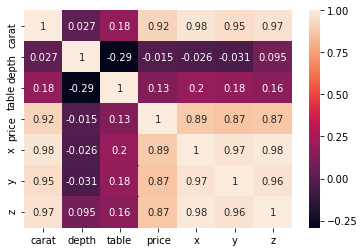

In [6]:
sns.heatmap(data.corr(),annot=True)

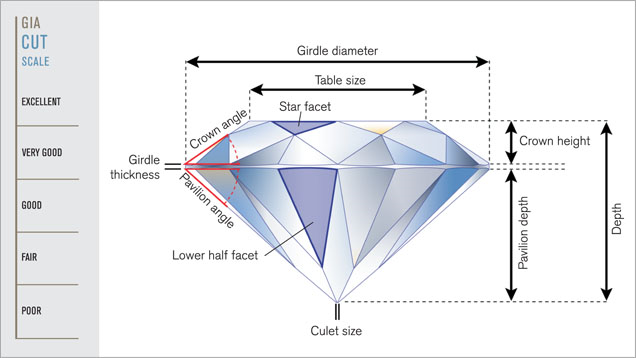

In [7]:
from IPython.display import Image
Image("/home/jc/Escritorio/Proyectos_finales_ironhack/ih_datamadpt0420_project_m2/GIA-Cut-Scale.png")

## Quick insights

- The sample has a total of 40455 diamonds
- carat: the average weight is 0.79, with a minimum weight is 0.2 and the max is 4.5
- depth: the average is 61.75mm , min = 43 and max = 79
- Correlation: carat , price , lenght , width and dept have a positive correlation . Price volatility will be more sensitive to those variables.

### Visualisation

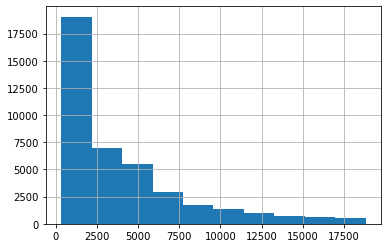

In [8]:
data['price'].hist() #most of the diamonds price are between 326€ (min) &  2400€ (50% quantile)

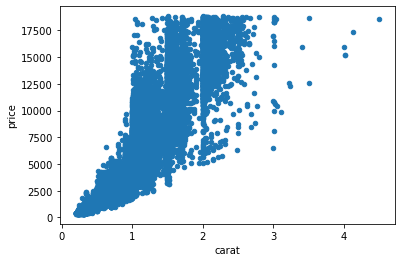

In [9]:
data.plot.scatter(x = 'carat' , y= 'price') # price grows exponentially from 0.2 until 2.5. From 2.5 there are not many diamonds and there is not that many correlation between carat and price

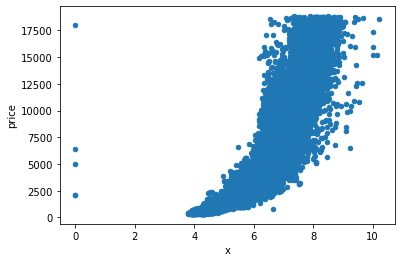

In [10]:
data.plot.scatter(x = 'x' , y= 'price') # price of the diamonds grows exponentially from 4 mm long. In addition , after 9 mm long the price does not change that much.

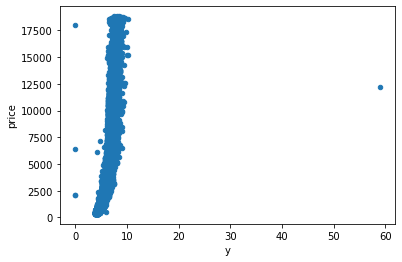

In [11]:
data.plot.scatter(x = 'y' , y= 'price') #most of the diamonds have a width between 3-9 mm


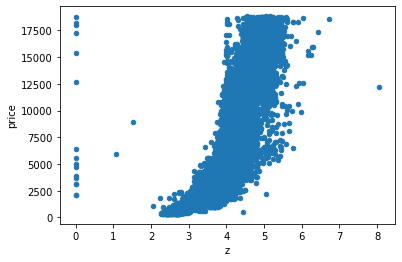

In [12]:
data.plot.scatter(x = 'z' , y= 'price') #price grows exponentially between 2-5mm depth

# Bonus Challenge: Hypothesis Testing

### Test 1 - one sample vs constant hypothesis test.



#### We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp , ttest_ind
%matplotlib inline

In [14]:
mean_nula = 4000

test_results = ttest_1samp(data['price'], mean_nula)
display(f'ttest: {test_results.statistic}')
display(f'Is the value pvalue lower than 0.05?: ({test_results.pvalue < 0.05})'   )

print(f'We can conlcude that our hypothesis is correct. The mean price of the dataset is significantly ,with an confidence interval of 95%, different than {mean_nula}')

'ttest: -3.604902369125729'

'Is the value pvalue lower than 0.05?: (True)'

We can conlcude that our hypothesis is correct. The mean price of the dataset is significantly ,with an confidence interval of 95%, different than 4000


### Test 2 - two independent samples. 




#### Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that you might feel suspicious about it: Sub-Test 6 : All cuts + color D vs All cuts + color E

In [15]:
data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [16]:
data_allcuts_colorD = data [data['color']== 'D']
data_allcuts_colorD_price = data_allcuts_colorD['price']
data_allcuts_colorD_price.head()

print(len(data_allcuts_colorD))

print(f'Variance:{data_allcuts_colorD_price.var()}')



5049
Variance:10993853.30481103


In [17]:
data_allcuts_colorE = data [data['color']== 'E']
data_allcuts_colorE_price = data_allcuts_colorE['price']
data_allcuts_colorE_price.head()
print(f' Dataset_color_E, lenght:  {len(data_allcuts_colorE)}')
print(type(data_allcuts_colorE))
print(f'Variance:{data_allcuts_colorE_price.var()}')

 Dataset_color_E, lenght:  7325
<class 'pandas.core.frame.DataFrame'>
Variance:11252978.619825682


In [18]:
print(f'Are variances equal?: {data_allcuts_colorE_price.var() == data_allcuts_colorD_price.var()} ')
print('Assuming that variaces are unequal')

ttest_ind(data_allcuts_colorD_price,data_allcuts_colorE_price, equal_var = False) #unequal variance

Are variances equal?: False 
Assuming that variaces are unequal


Ttest_indResult(statistic=0.7646978610927021, pvalue=0.44446798501477136)

In [19]:
print(f'P value, 0.444, is much higher than  0.05 . There is no significant price change between D and E colour')

P value, 0.444, is much higher than  0.05 . There is no significant price change between D and E colour
